# Wine Quality Classification: Machine Learning Models

This notebook focuses on building and comparing several classification models to predict wine quality classes. We'll work with the Wine dataset, which contains various chemical properties of different wines and their corresponding quality classes.

## 1. Introduction and Data Loading

In this first section, we'll load the Wine dataset and take an initial look at its structure. This dataset contains features representing chemical properties of wines and a target variable classifying wines into three different classes.

In [10]:
# Import necessary libraries for data loading and manipulation
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

# Create a DataFrame for easier data manipulation and visualization
df = pd.DataFrame(X, columns=wine_data.feature_names)
df['target'] = y

# Display basic information about the dataset
print(f"Dataset dimensions: {df.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
df.head()

Dataset dimensions: (178, 14)
Number of classes: 3
Class distribution: [59 71 48]

First few rows of the dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. Data Exploration and Visualization

Now we'll explore the dataset to better understand its characteristics. This step is crucial for:
- Understanding the distribution of the target classes
- Identifying potential relationships between features
- Detecting outliers or anomalies
- Gaining insights that might help in feature selection

In [12]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for better visualizations
sns.set(style="whitegrid", palette="viridis")

# 2.1 Basic Statistical Analysis
print("Basic Statistical Summary:")
df.describe().round(2)

Basic Statistical Summary:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


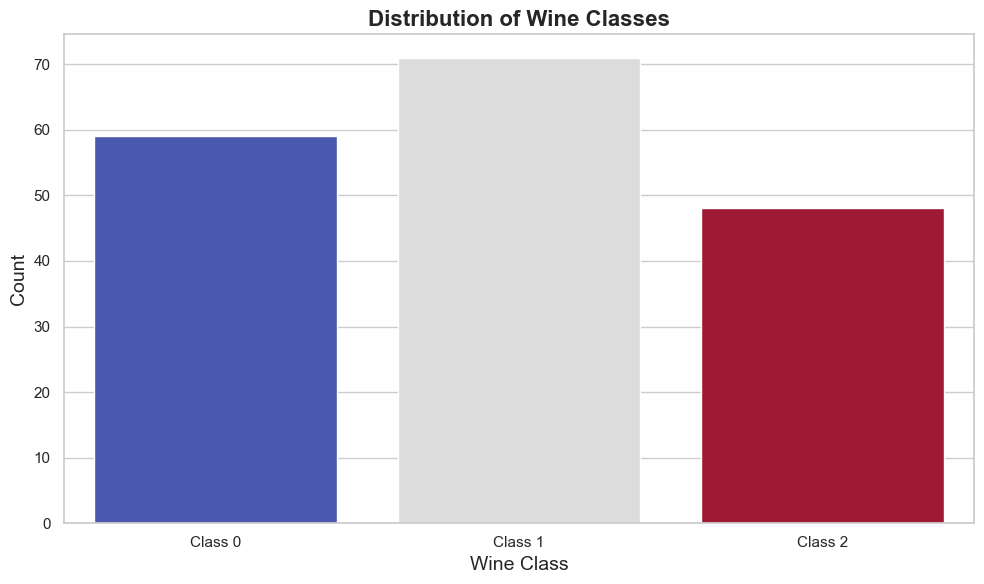

In [14]:
# Distribution of target classes
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='target', data=df, palette='coolwarm', legend=False)
plt.title('Distribution of Wine Classes', fontsize=16, fontweight='bold')
plt.xlabel('Wine Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1, 2], ['Class 0', 'Class 1', 'Class 2'])
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

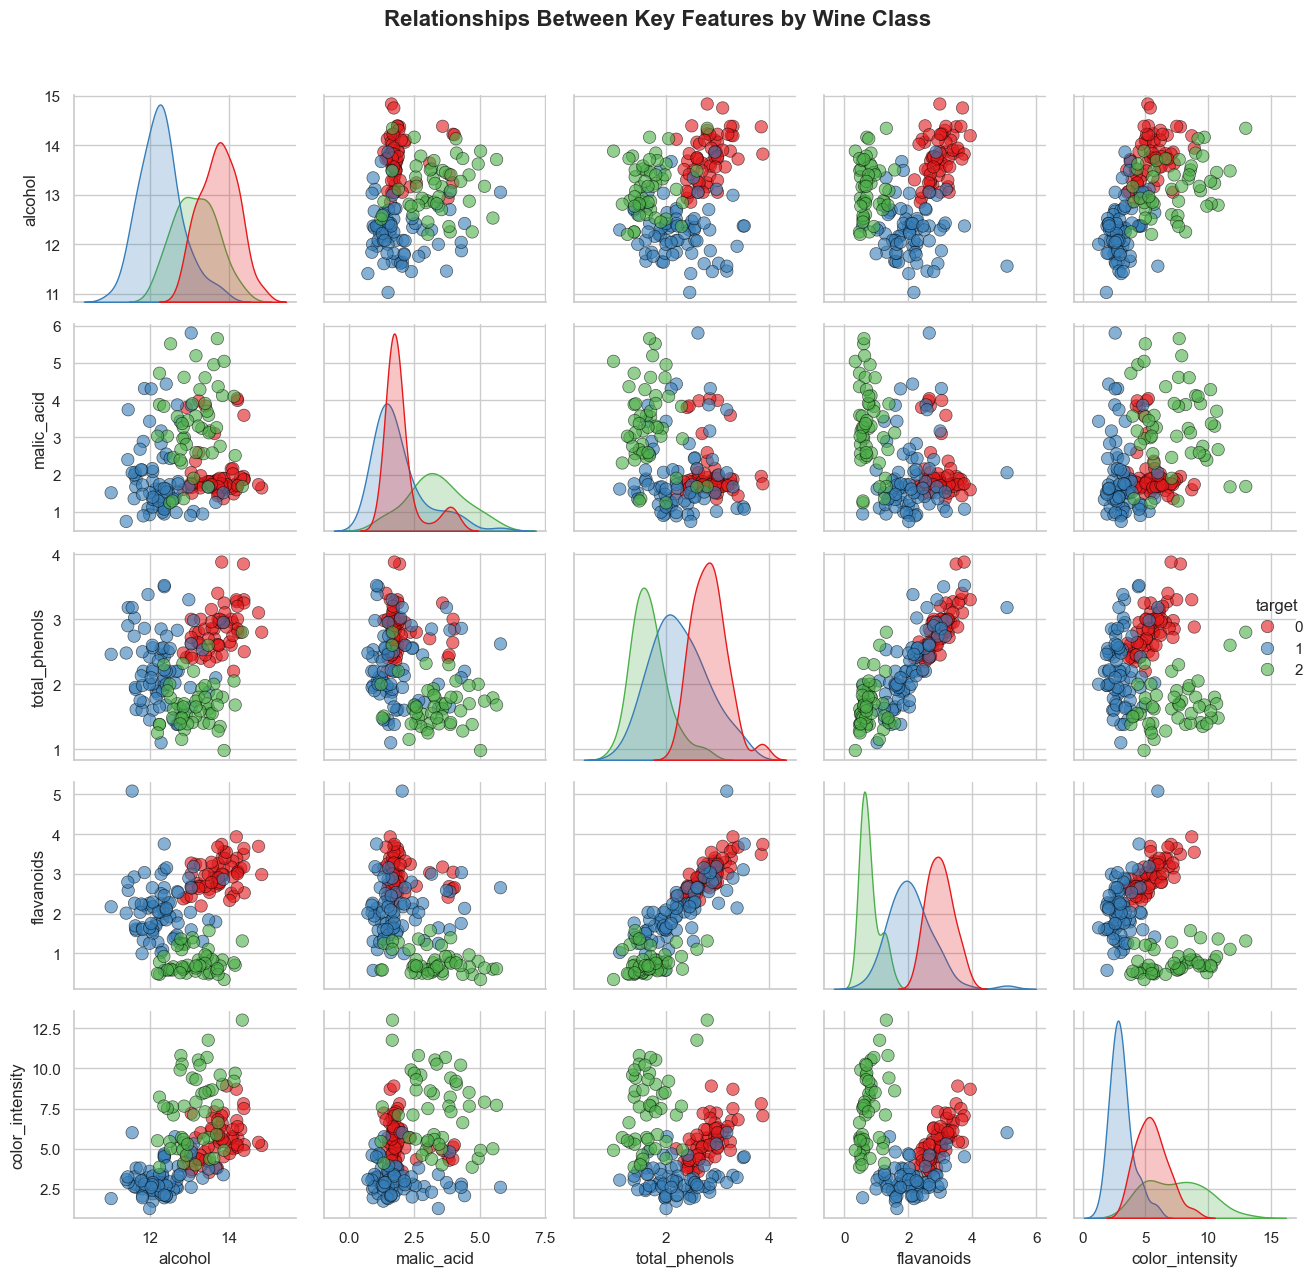

In [11]:
#Enhanced pairplot for key features
selected_features = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity', 'target']
plt.figure(figsize=(12, 10))
sns.pairplot(df[selected_features], 
             hue='target', 
             palette='Set1',
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k', 'linewidth': 0.5})
plt.suptitle('Relationships Between Key Features by Wine Class', fontweight='bold', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

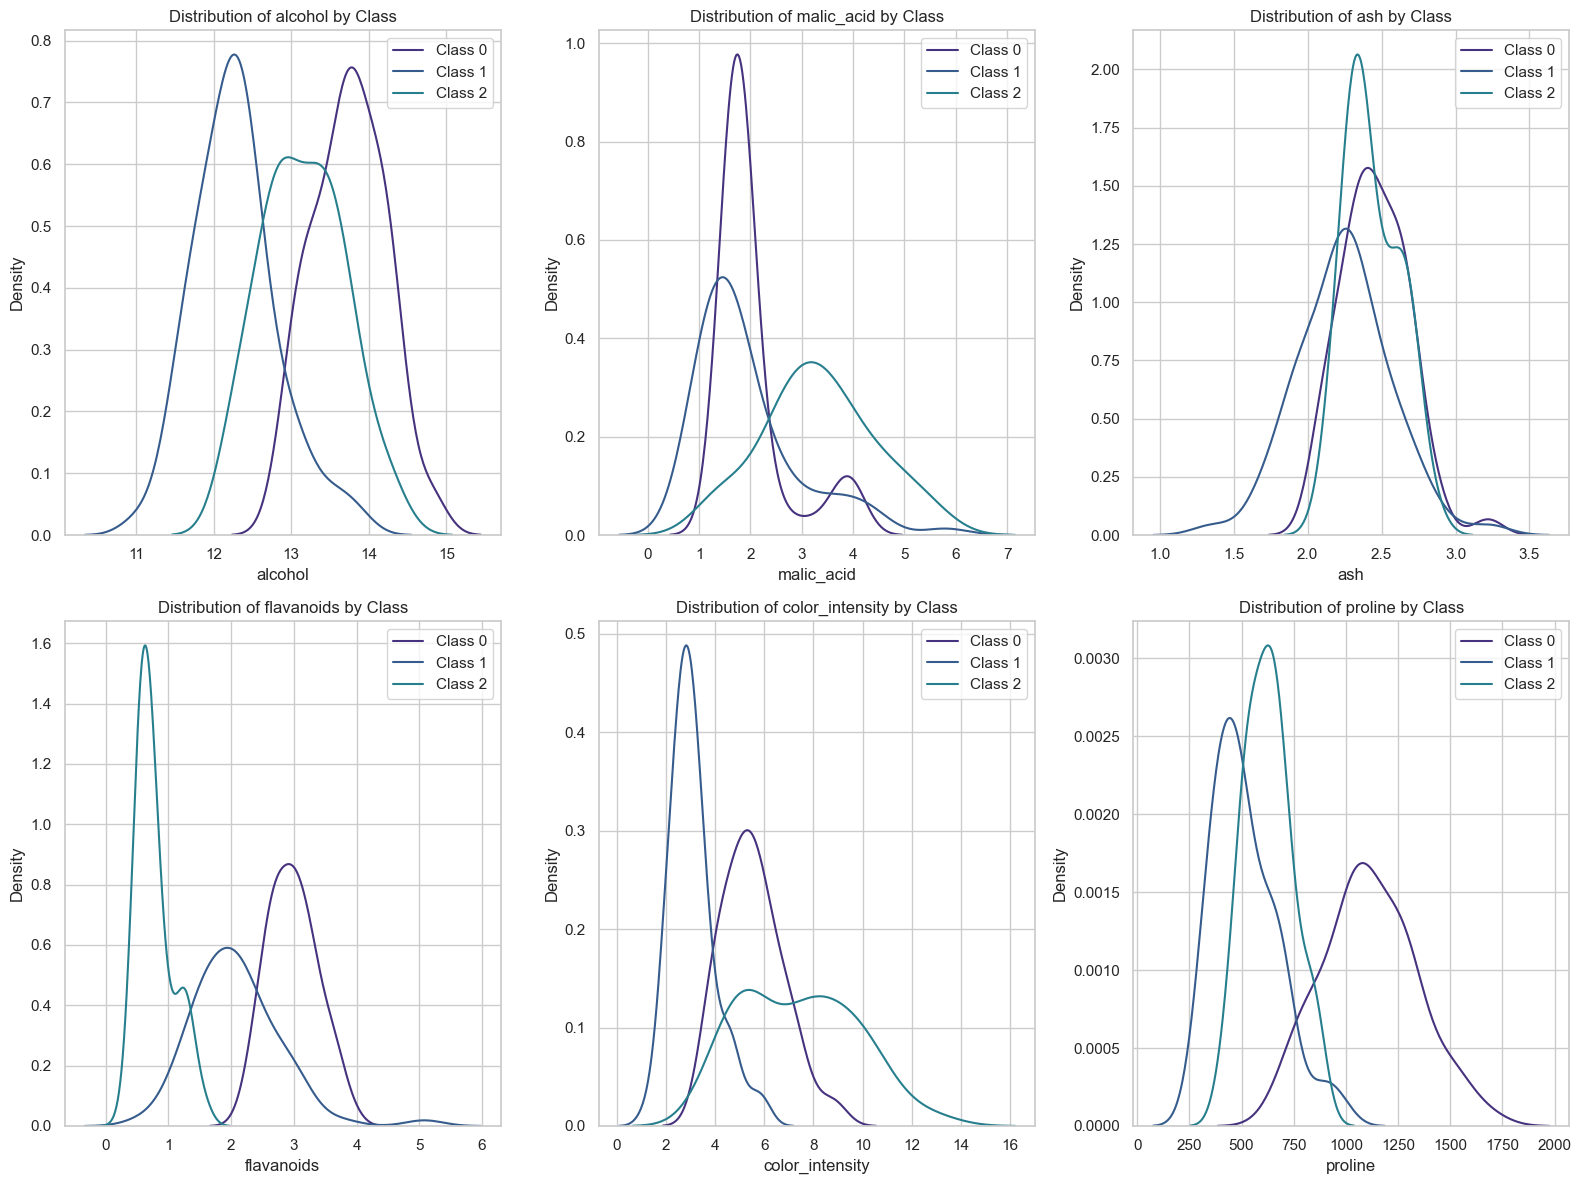

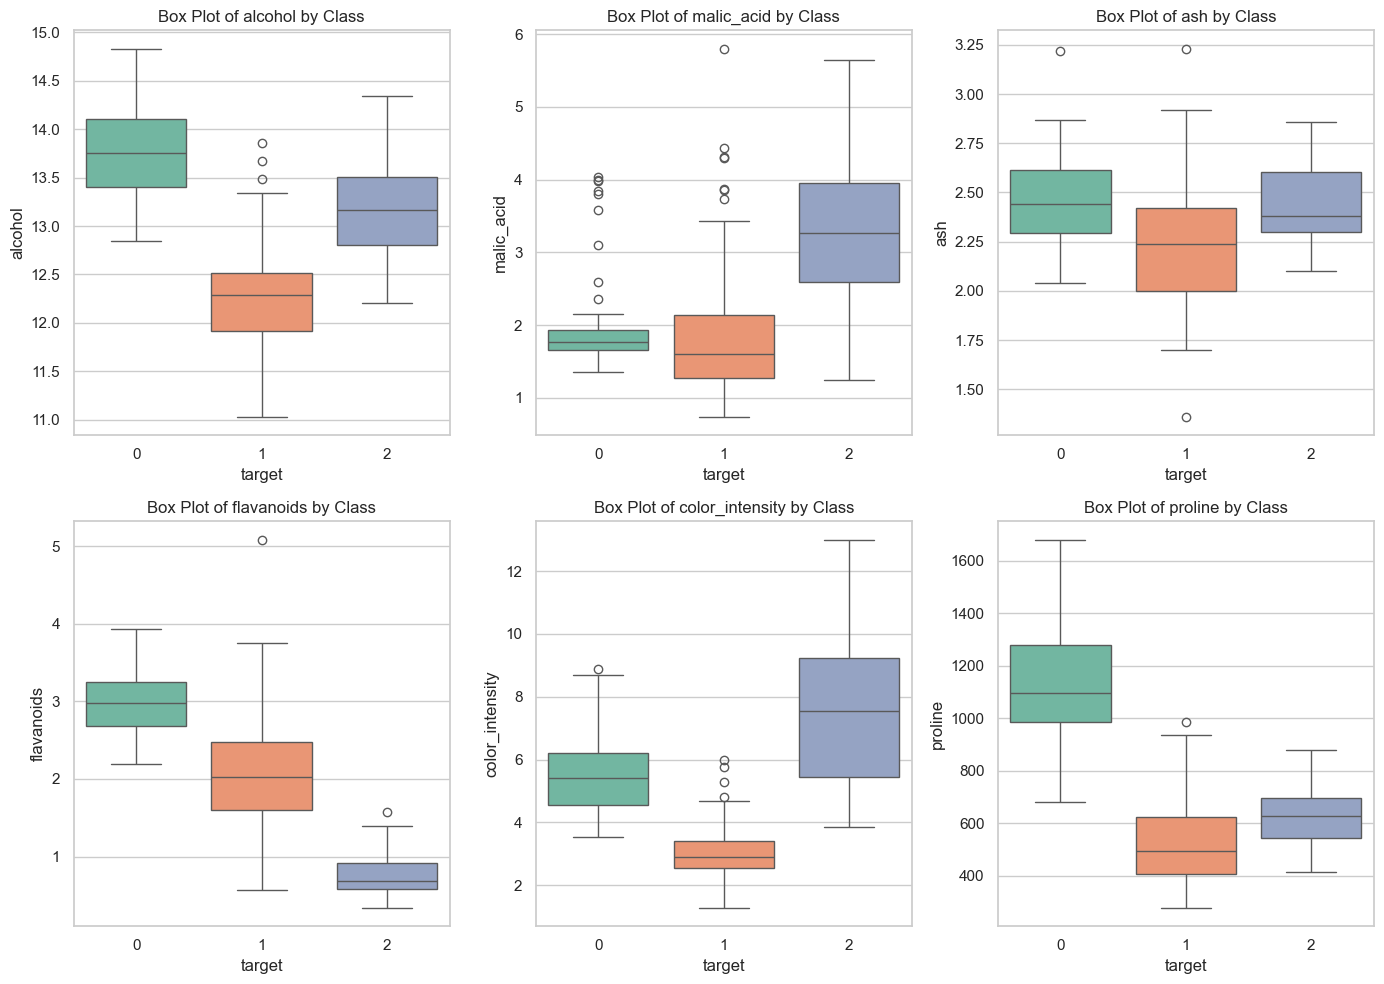

In [16]:
#Feature distributions by class
plt.figure(figsize=(16, 12))
features_to_plot = ['alcohol', 'malic_acid', 'ash', 'flavanoids', 'color_intensity', 'proline']
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    for target in [0, 1, 2]:
        sns.kdeplot(df[df['target'] == target][feature], label=f'Class {target}')
    plt.title(f'Distribution of {feature} by Class', fontsize=12)
    plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df, hue='target', palette='Set2', legend=False)
    plt.title(f'Box Plot of {feature} by Class')
plt.tight_layout()
plt.show()

## 3. Data Preparation

In this section, we'll prepare the data for model training:
- Analyze feature correlations to understand relationships
- Select relevant features based on correlation analysis
- Scale the features to standardize their ranges
- Split the data into training and testing sets

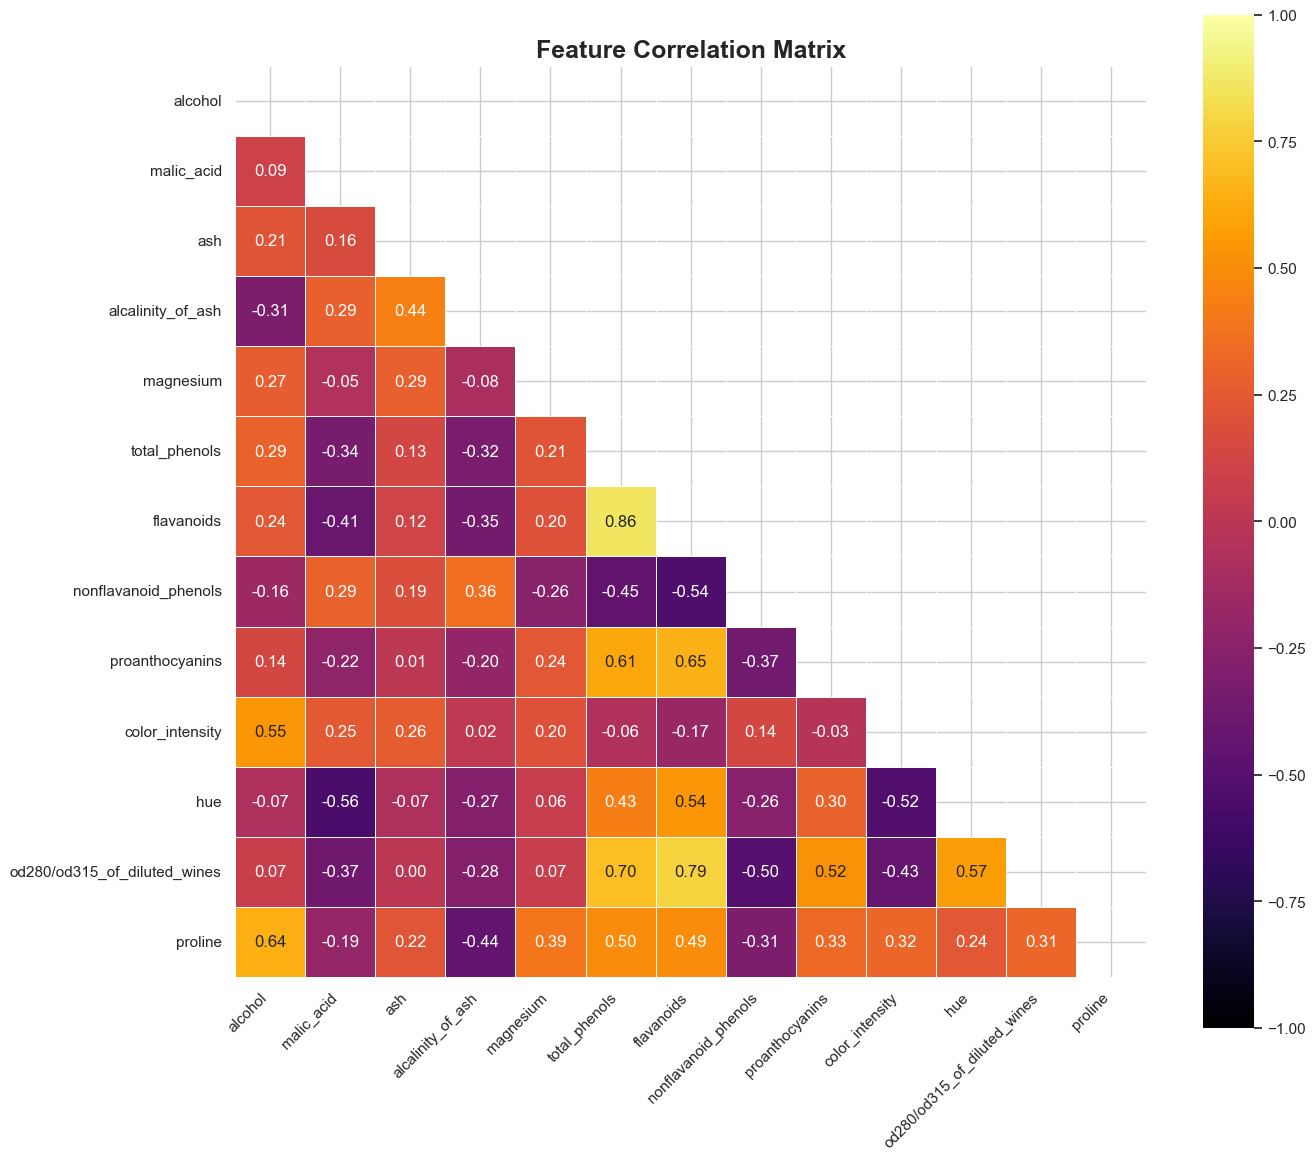

Correlation strength between all feature pairs:

All feature correlations (sorted by absolute strength):
total_phenols                  and flavanoids                    : +0.865 (abs: 0.865)
flavanoids                     and od280/od315_of_diluted_wines  : +0.787 (abs: 0.787)
total_phenols                  and od280/od315_of_diluted_wines  : +0.700 (abs: 0.700)
flavanoids                     and proanthocyanins               : +0.653 (abs: 0.653)
alcohol                        and proline                       : +0.644 (abs: 0.644)
total_phenols                  and proanthocyanins               : +0.612 (abs: 0.612)
hue                            and od280/od315_of_diluted_wines  : +0.565 (abs: 0.565)
malic_acid                     and hue                           : -0.561 (abs: 0.561)
alcohol                        and color_intensity               : +0.546 (abs: 0.546)
flavanoids                     and hue                           : +0.543 (abs: 0.543)
flavanoids               

In [18]:
# Correlation Analysis
# Calculate correlation matrix
correlation_matrix = df.drop('target', axis=1).corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='inferno', 
            linewidths=0.5,
            mask=mask,
            square=True,
            vmin=-1, 
            vmax=1)
plt.title('Feature Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3.2 Generate a sorted list of all feature correlations
print("Correlation strength between all feature pairs:")
correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_pairs.append(
            (correlation_matrix.columns[i], 
             correlation_matrix.columns[j], 
             abs(correlation_matrix.iloc[i, j]))
        )

# Sort correlations by absolute strength (descending)
correlation_pairs.sort(key=lambda x: x[2], reverse=True)

# Display all correlations in descending order of strength
print("\nAll feature correlations (sorted by absolute strength):")
for feat1, feat2, corr_strength in correlation_pairs:
    correlation_value = correlation_matrix.loc[feat1, feat2]
    print(f"{feat1:30} and {feat2:30}: {correlation_value:+.3f} (abs: {corr_strength:.3f})")

# Additionally, still highlight highly correlated features
print("\nHighly correlated feature pairs (|correlation| > 0.8):")
highly_correlated = []
for feat1, feat2, corr_strength in correlation_pairs:
    if corr_strength > 0.8:
        correlation_value = correlation_matrix.loc[feat1, feat2]
        print(f"{feat1:30} and {feat2:30}: {correlation_value:+.3f}")
        highly_correlated.append((feat1, feat2, correlation_value))

In [20]:
#Feature Selection and Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select all features for now (we could drop highly correlated ones)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")

#Feature Scaling
# Scale the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier manipulation if needed
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display sample of scaled data
print("\nSample of scaled training data:")
X_train_scaled_df.head()

Training set shape: (142, 13)
Testing set shape: (36, 13)
Training set class distribution: [47 57 38]
Testing set class distribution: [12 14 10]

Sample of scaled training data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.385801,-0.637871,1.776668,-1.224532,0.696430,0.526865,0.732292,-0.169549,-0.415783,-0.167467,0.624378,0.252908,0.467725
1,0.948519,-0.765445,1.253174,0.853284,0.091785,1.172795,1.333181,-0.590457,1.349742,0.305303,1.067155,0.151048,1.815768
2,0.523354,-0.519409,0.954034,-1.046433,-0.445678,0.930572,1.006382,-0.169549,-0.260002,-0.081509,-0.128343,0.893172,1.516203
3,0.973529,-0.555859,0.168793,-1.076116,-0.714409,0.526865,0.816627,-0.590457,0.363125,0.262324,0.890044,0.427526,1.932265
4,0.435820,0.820120,0.056615,0.556453,-0.512860,-0.555068,-1.291756,0.756449,-0.606183,1.474335,-1.766619,-1.435059,-0.297831


## 4. Model Training

In this section, we'll train different classification models:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Support Vector Machine (SVM)
- Random Forest

We'll evaluate each model's performance and optimize hyperparameters for at least one model.

Logistic Regression Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



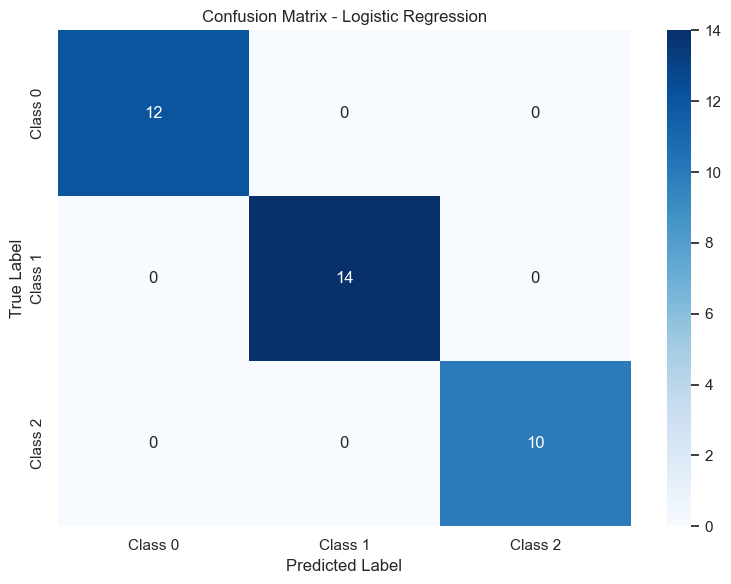

In [22]:
#Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Logistic Regression
# Train the model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', C=1.0, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

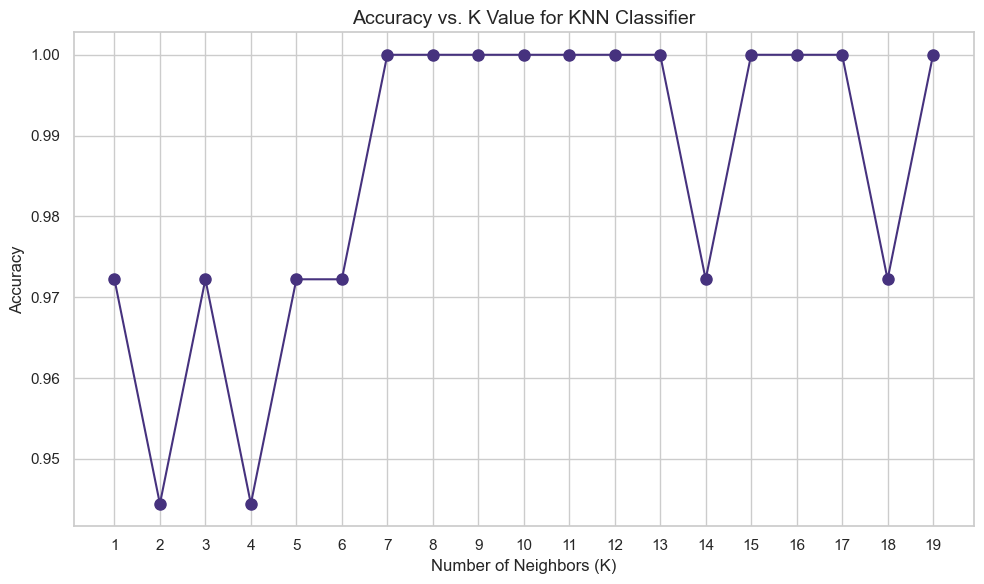

Optimal K value: 7 with accuracy: 1.0000

KNN Classification Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



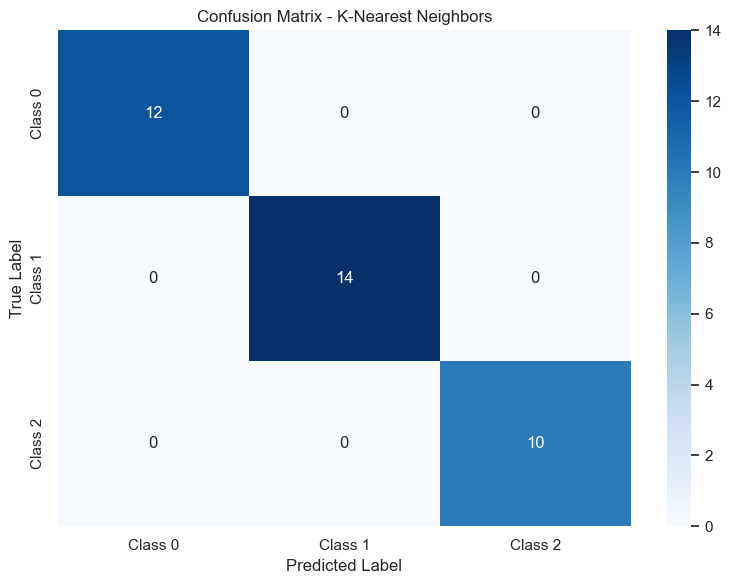

In [38]:
#K-Nearest Neighbors with hyperparameter tuning
k_range = range(1, 20)
k_scores = []

# Find optimal k value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    k_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', markersize=8, linestyle='-')
plt.title('Accuracy vs. K Value for KNN Classifier', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal k
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"Optimal K value: {optimal_k} with accuracy: {max(k_scores):.4f}")

# Train model with optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_knn = knn_optimal.predict(X_test_scaled)

# Evaluate the model
print("\nKNN Classification Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.tight_layout()
plt.show()

Decision Tree Results:
Accuracy: 0.9444

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



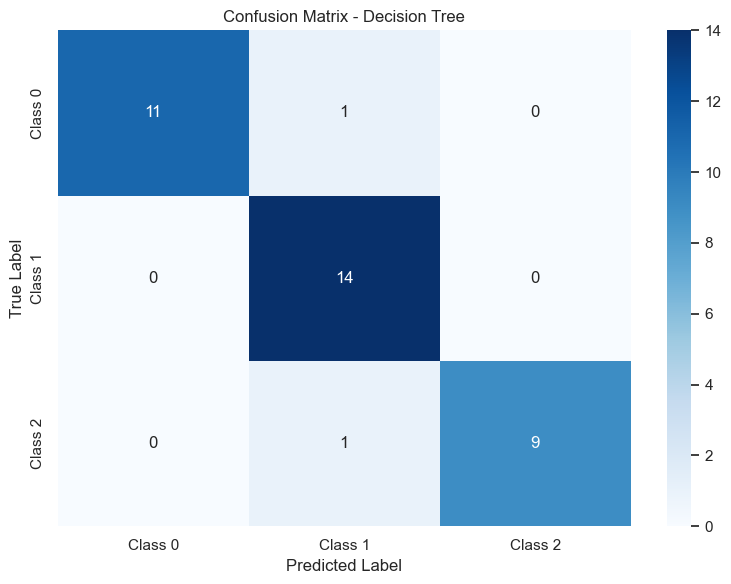

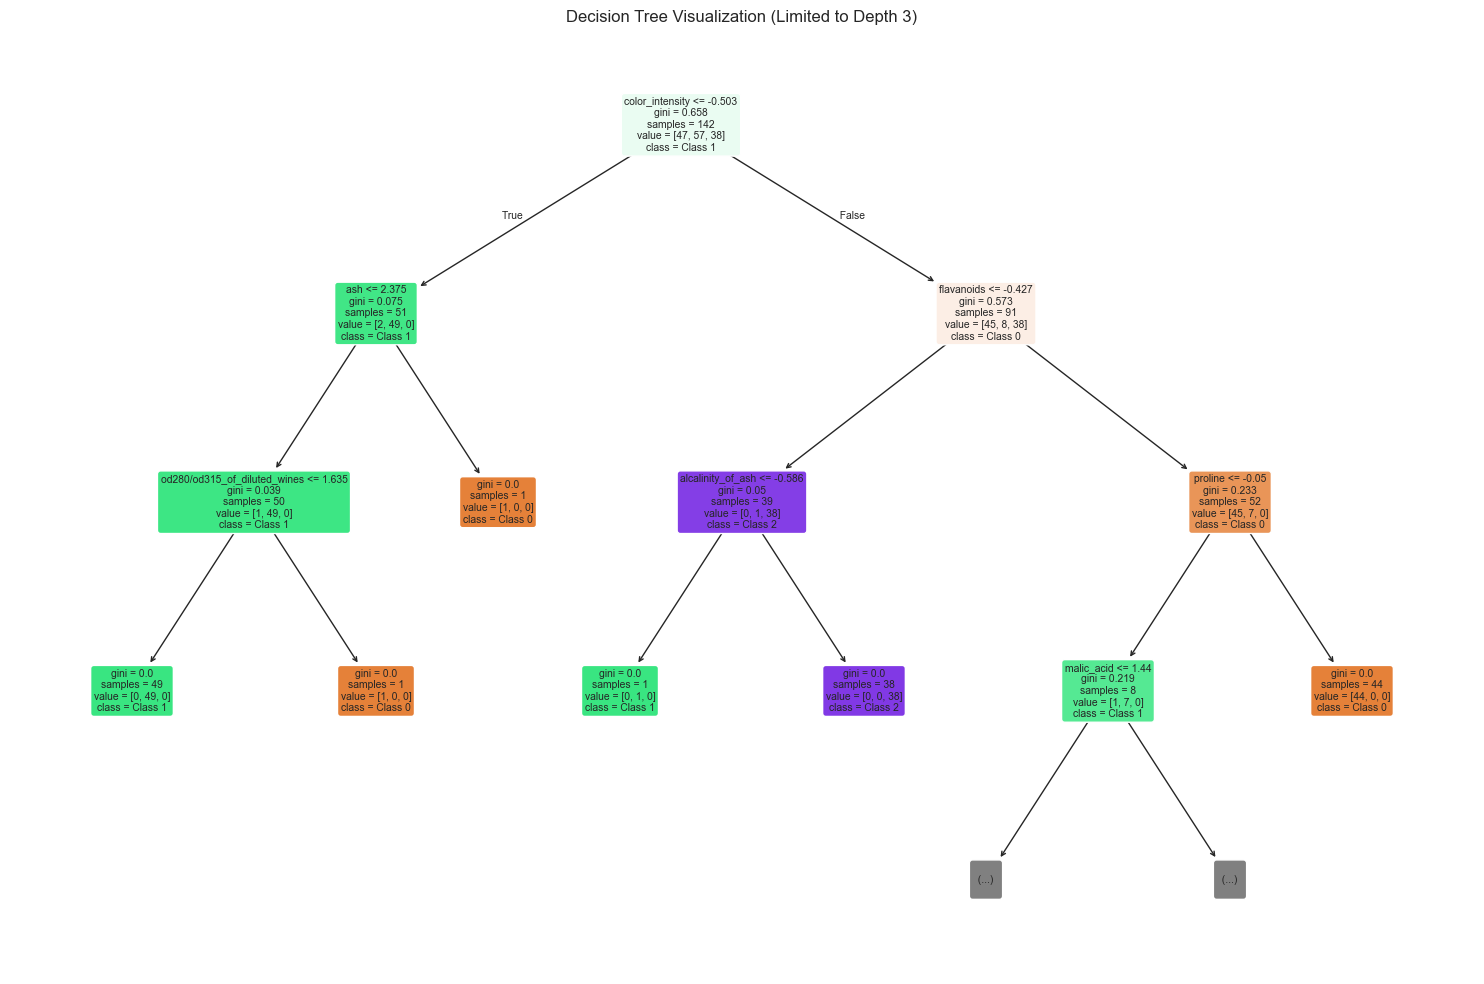

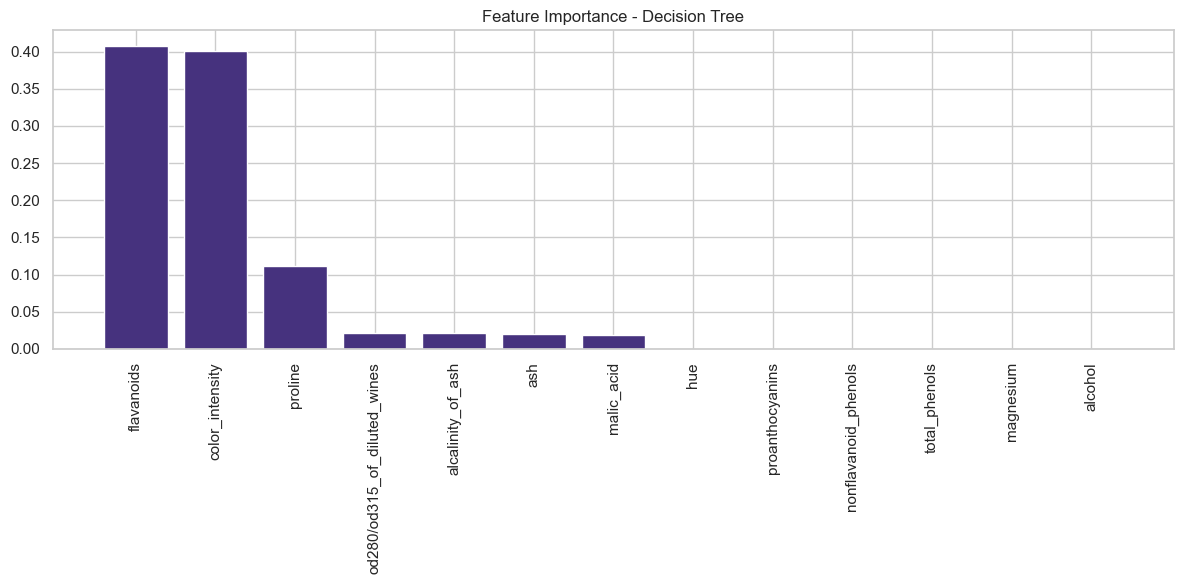

In [24]:
#Decision Tree
# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

# Visualize the tree
plt.figure(figsize=(15, 10))
from sklearn.tree import plot_tree
plot_tree(dt_model, 
          feature_names=X.columns,
          class_names=['Class 0', 'Class 1', 'Class 2'],
          filled=True, 
          rounded=True,
          max_depth=3) # Limiting depth for visibility
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.tight_layout()
plt.show()

# Feature importance
plt.figure(figsize=(12, 6))
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()

SVM Results:
Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



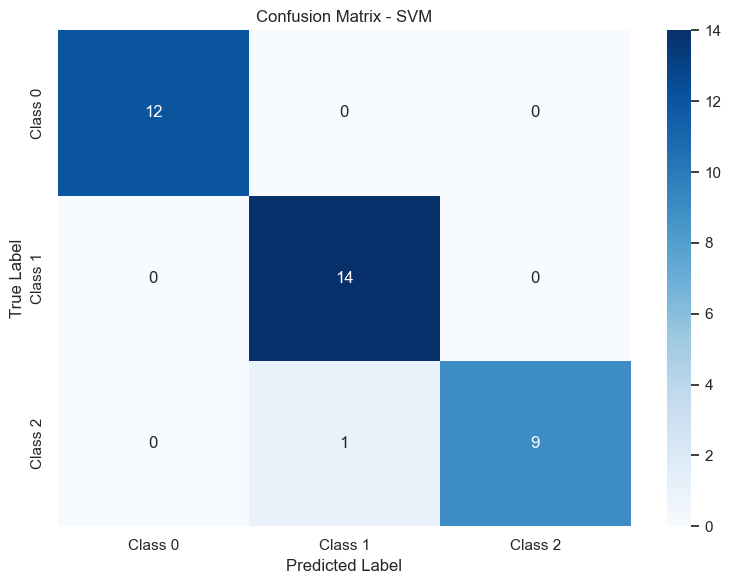


Best SVM parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9862

Optimized SVM accuracy: 0.9722


In [28]:
#Support Vector Machine (SVM)
# Train the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()

# Optional: SVM parameter tuning using grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest SVM parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the optimized model
svm_optimal = SVC(**grid_search.best_params_, random_state=42)
svm_optimal.fit(X_train_scaled, y_train)
y_pred_svm_opt = svm_optimal.predict(X_test_scaled)

print(f"\nOptimized SVM accuracy: {accuracy_score(y_test, y_pred_svm_opt):.4f}")


Random Forest Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



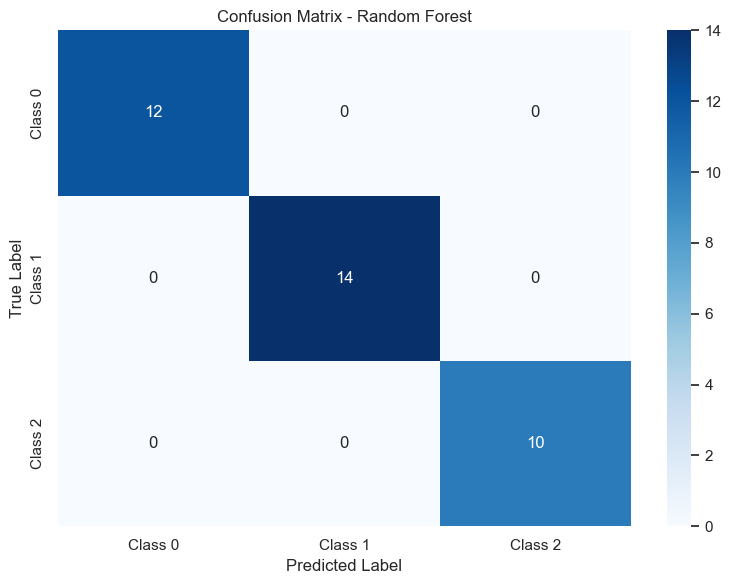

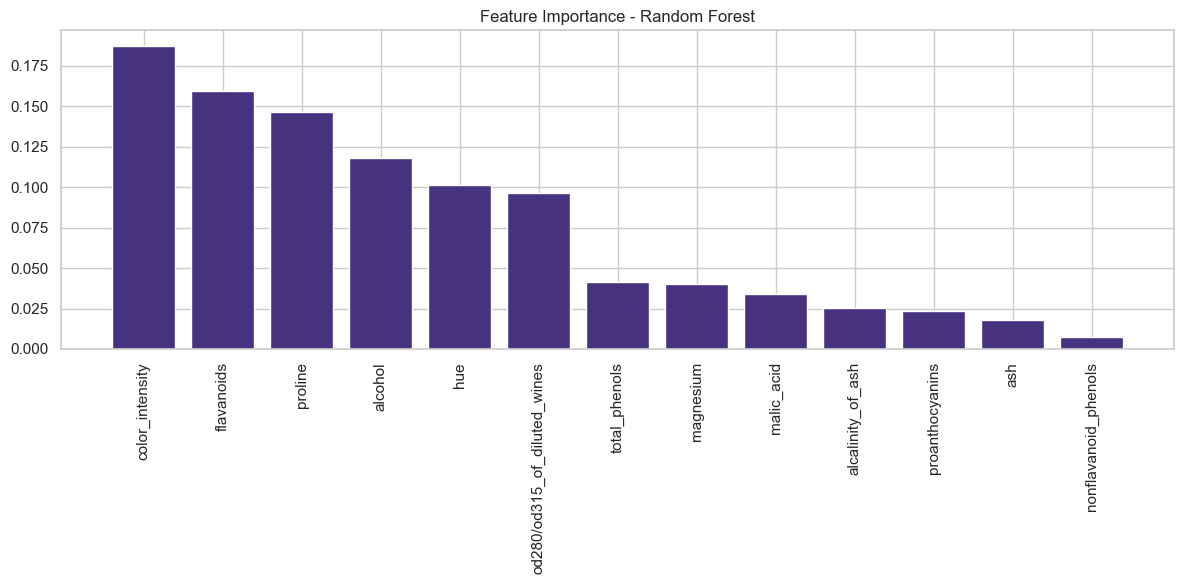

In [40]:
#Random Forest
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

# Feature importance
plt.figure(figsize=(12, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

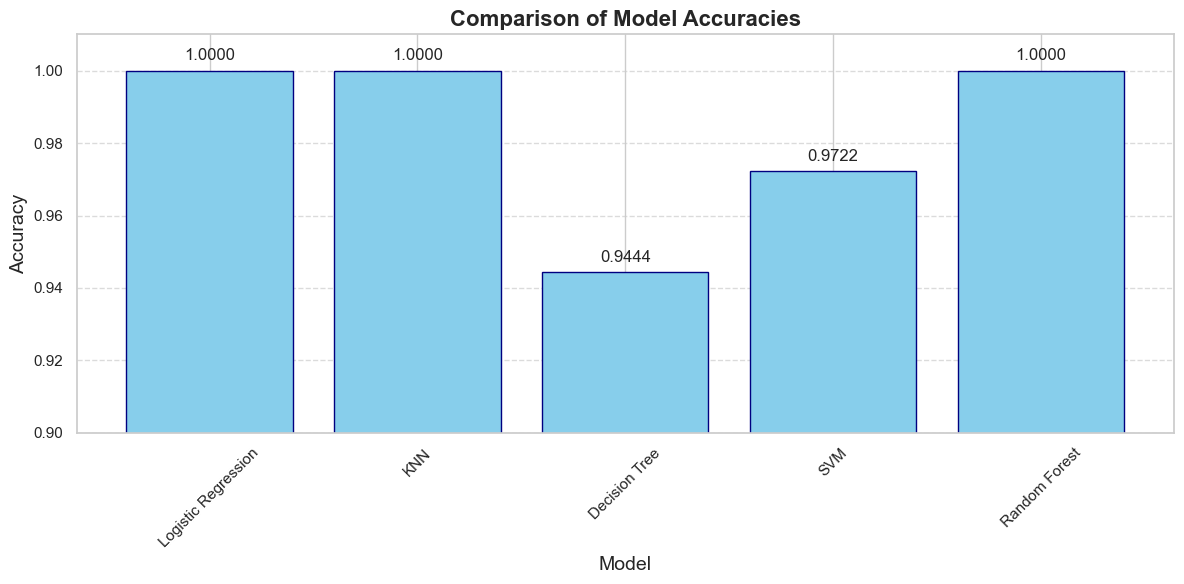

In [50]:
#Model Comparison
# Collect results
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]

# Create comparison bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='navy')

# Customize the plot
plt.ylim([0.9, 1.01])  # Set y-axis to start from 0.9 for better visibility of differences
plt.title('Comparison of Model Accuracies', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{height:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [54]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

# Define models for cross-validation
cv_models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='liblinear', C=1.0, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=optimal_k)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Scale the entire dataset for cross-validation
X_full = df.drop('target', axis=1)
y_full = df['target']
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Perform cross-validation
cv_results = []
cv_std = []
model_names = []

for name, model in cv_models:
    scores = cross_val_score(model, X_full_scaled, y_full, cv=5, scoring='accuracy')
    cv_results.append(np.mean(scores))
    cv_std.append(np.std(scores))
    model_names.append(name)
    print(f"{name} CV Accuracy: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

# Create DataFrame for results
cv_df = pd.DataFrame({
    'Model': model_names,
    'CV Mean Accuracy': cv_results,
    'CV Std Dev': cv_std
})

# Display CV results
cv_df

Logistic Regression CV Accuracy: 0.9778 (±0.0208)
KNN CV Accuracy: 0.9665 (±0.0207)
Decision Tree CV Accuracy: 0.8710 (±0.0374)
SVM CV Accuracy: 0.9833 (±0.0222)
Random Forest CV Accuracy: 0.9721 (±0.0176)


,Model,CV Mean Accuracy,CV Std Dev
0,Logistic Regression,0.977778,0.020787
1,KNN,0.966508,0.020747
2,Decision Tree,0.870952,0.037386
3,SVM,0.983333,0.022222
4,Random Forest,0.972063,0.017571


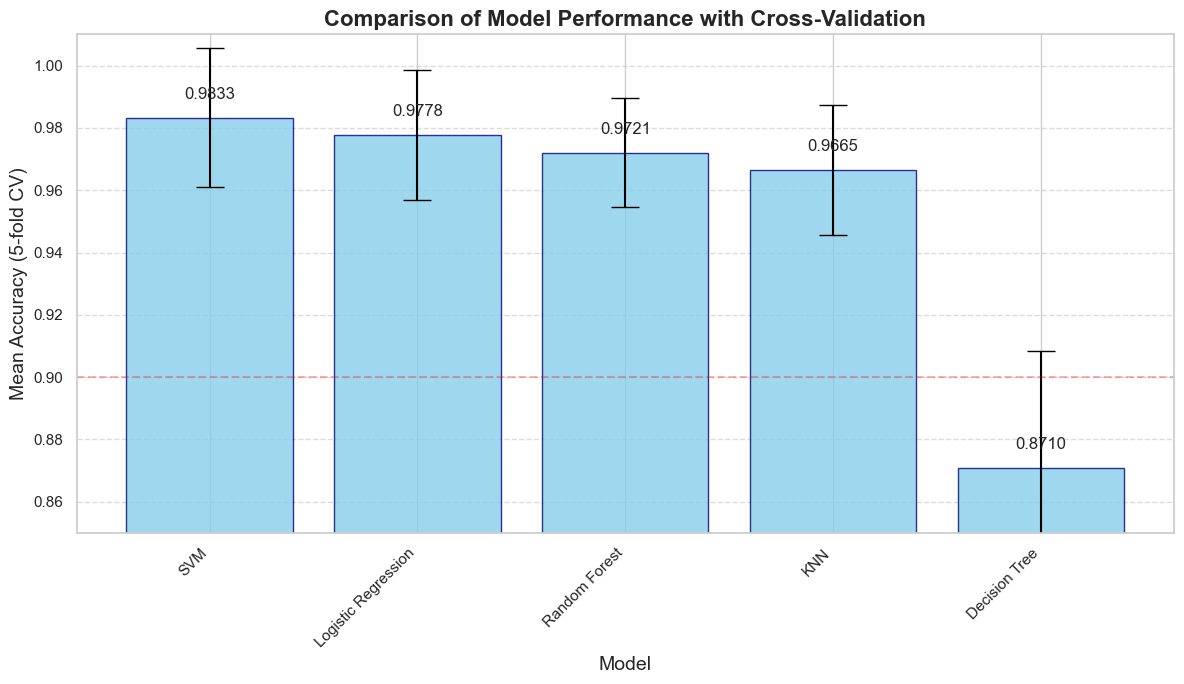

Model Ranking Based on Cross-Validation:
1. SVM: 0.9833 (±0.0222)
2. Logistic Regression: 0.9778 (±0.0208)
3. Random Forest: 0.9721 (±0.0176)
4. KNN: 0.9665 (±0.0207)
5. Decision Tree: 0.8710 (±0.0374)


In [52]:
#Visualize Cross-Validation Results
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create data for visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']
accuracies = [0.977778, 0.966508, 0.870952, 0.983333, 0.972063]
std_devs = [0.020787, 0.020747, 0.037386, 0.022222, 0.017571]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'CV Mean Accuracy': accuracies,
    'CV Std Dev': std_devs
})

# Sort by accuracy
results_df = results_df.sort_values('CV Mean Accuracy', ascending=False)

# Create bar chart with error bars
plt.figure(figsize=(12, 7))
bars = plt.bar(
    results_df['Model'], 
    results_df['CV Mean Accuracy'], 
    yerr=results_df['CV Std Dev'],
    capsize=10, 
    color='skyblue', 
    edgecolor='navy',
    alpha=0.8
)

# Customize plot
plt.ylim([0.85, 1.01])
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.3)
plt.title('Comparison of Model Performance with Cross-Validation', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Accuracy (5-fold CV)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Print ranking
print("Model Ranking Based on Cross-Validation:")
for i, (model, acc, std) in enumerate(zip(
    results_df['Model'], 
    results_df['CV Mean Accuracy'], 
    results_df['CV Std Dev'])):
    print(f"{i+1}. {model}: {acc:.4f} (±{std:.4f})")

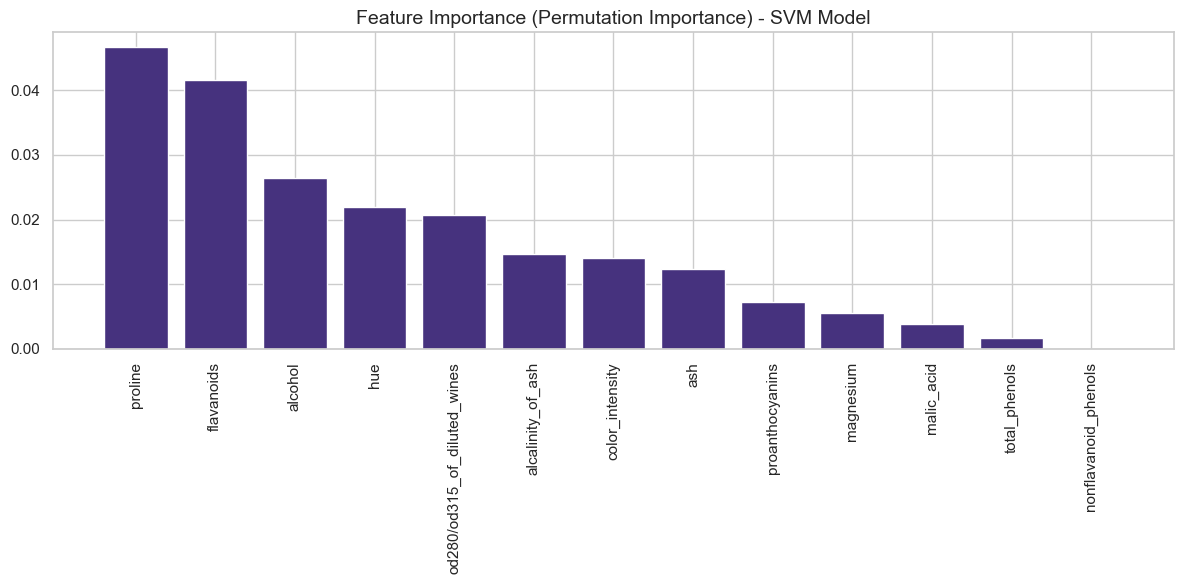

In [56]:
#Select the best model (SVM based on cross-validation)
best_model = SVC(random_state=42)
best_model.fit(X_full_scaled, y_full)

# 6.2 Feature importance analysis (using permutation importance since SVM doesn't provide feature importance directly)
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_full_scaled, y_full, n_repeats=10, random_state=42)
importance = result.importances_mean
sorted_idx = np.argsort(importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(X_full.shape[1]), importance[sorted_idx], align='center')
plt.xticks(range(X_full.shape[1]), X_full.columns[sorted_idx], rotation=90)
plt.title('Feature Importance (Permutation Importance) - SVM Model', fontsize=14)
plt.tight_layout()  # This line was incomplete in the previous code
plt.show()

## 7. Conclusions

After analyzing the wine dataset and training five different classification models, we can draw the following conclusions:

1. **Model Performance**: All models showed excellent performance in classifying wines, with cross-validation accuracies above 87%. The SVM model stood out as the most accurate (98.33%), followed by Logistic Regression (97.78%) and Random Forest (97.21%).

2. **Important Features**: The feature importance analysis revealed that "proline", "flavanoids", "alcohol", and "hue" are the most determinant factors for classifying different wine types. These chemical properties show the highest predictive power in distinguishing between the three classes of wine.

3. **Feature Correlation**: We identified a strong correlation between 'total_phenols' and 'flavanoids' (+0.865), suggesting that these chemical characteristics are closely related and might be partially redundant for the models.

4. **Model Robustness**: Cross-validation confirmed that the models are robust, with relatively low standard deviations in their accuracies. Random Forest showed the lowest variability (±1.8%), making it a solid choice if we're looking for consistency.

5. **Limitations**: Despite excellent performance, we should consider that the dataset is relatively small (178 samples), which might limit the generalization of our models to new data.

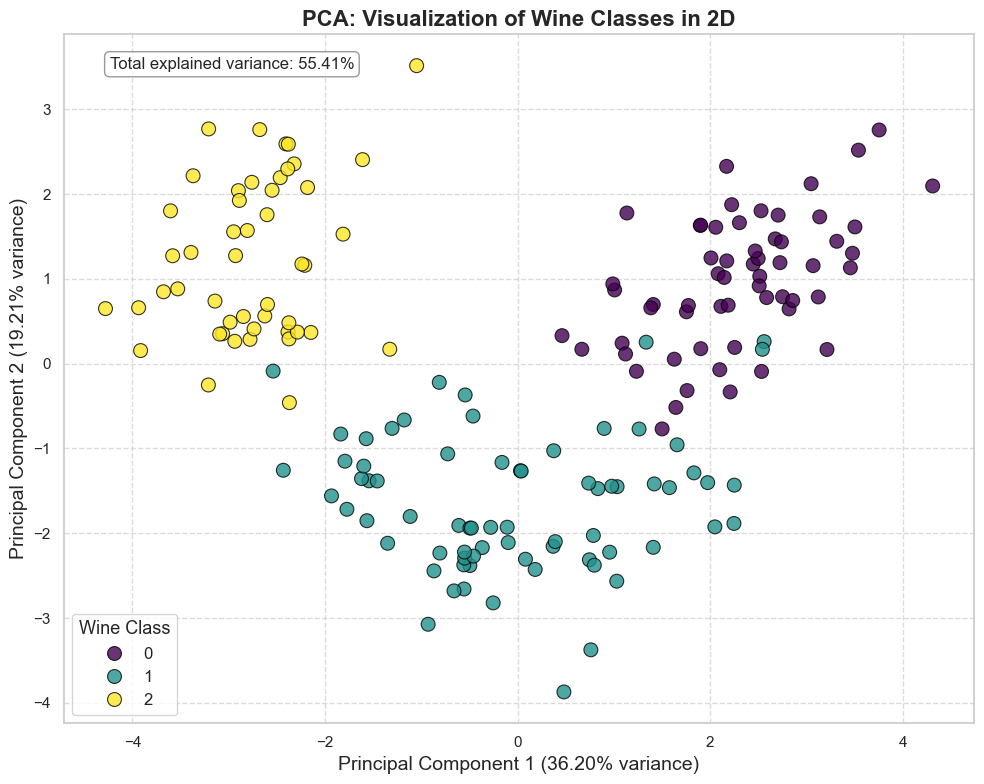

,PC1,PC2
alcohol,0.144329,0.483652
malic_acid,-0.245188,0.224931
ash,-0.002051,0.316069
alcalinity_of_ash,-0.239320,-0.010591
magnesium,0.141992,0.299634
total_phenols,0.394661,0.065040
flavanoids,0.422934,-0.003360
nonflavanoid_phenols,-0.298533,0.028779
proanthocyanins,0.313429,0.039302
color_intensity,-0.088617,0.529996


In [60]:
#EXTRA Visualization with PCA
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full_scaled)

# Create DataFrame for easier visualization
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Class': y_full
})

# Visualize PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', 
                palette='viridis', 
                data=pca_df, 
                s=100, 
                alpha=0.8,
                edgecolor='k')

plt.title('PCA: Visualization of Wine Classes in 2D', fontsize=16, fontweight='bold')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Wine Class', fontsize=12, title_fontsize=13)

# Add text about total explained variance
total_var = pca.explained_variance_ratio_.sum()
plt.annotate(f'Total explained variance: {total_var:.2%}', 
             xy=(0.05, 0.95), 
             xycoords='axes fraction', 
             fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Show how much each original feature contributes to the principal components
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X_full.columns)
loading_df